In [1]:
## the Pearson corr between the trial-averaged dff0 of each voxel and stim label (0-1)
## slide window, and take the largest corr
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tf

In [ ]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                    '20230420-nsyb-G7f-rAch1h/fly2/data',
                    '20230420-nsyb-G7f-rAch1h/fly3/data',
                    '20230428-nsyb-G7f-rAch1h/fly1/data',
                    '20230507-nsyb-G7f-rAch1h/fly1/data',
                    '20230510-nsyb-G7f-rAch1h/fly1/data',
                    '20230510-nsyb-G7f-rAch1h/fly2/data',
                    '20230511-nsyb-G7f-rAch1h/fly2/data',
                    '20230511-nsyb-G7f-rAch1h/fly3/data',
                    '20230515-nsyb-G7f-rAch1h/fly1/data']

# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']

In [2]:
data_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-rAch1h'
file_folders = file_folder_list_1
print(file_folders)
list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)
atlas_z_range = range(13,38)
num_channel = 2
num_trial = 180

save_path = '../results/Ach-ver16/figures-for-ver16-final6'

stim_len = [12,12] # 6 for 5ht
num_x = 256
num_y = 256
num_z = 25

len_before_stim = 3
dff0_file_name = ['dff0_-3-20_down1_C2.npy','dff0_-3-20_down1_C3.npy']

['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1', '20230605-fly1', '20230615-fly1', '20230615-fly3', 'data_ach_c1.npy', 'data_ach_c2.npy', 'NO_20230511-fly4']


In [3]:
def compute_mean_response_corr(data,atlas,stim_len,len_before_stim):
    num_x = np.size(data,0)
    num_y = np.size(data,1)
    num_z = np.size(data,2)
    num_tp = np.size(data,4)
    atlas_mask = atlas>0
    mean_corr = np.zeros((num_x,num_y,num_z))
    mean_corr_tp = np.zeros((num_x,num_y,num_z))
    for i in range(num_x):
        for j in range(num_y):
            for k in range(num_z):
                if not atlas_mask[i,j,k]:
                    continue
                a = np.squeeze(data[i,j,k,:,:])
                aa = np.mean(a,0)
                b = np.concatenate((np.zeros(len_before_stim),\
                        np.ones(stim_len),\
                        np.zeros(num_tp-len_before_stim-stim_len)),\
                        axis = 0)
                the_corr = np.zeros(num_tp)
                for m in range(0,num_tp):## sliding window
                    bb = np.concatenate((np.zeros(m),b),axis = 0)
                    bb = bb[range(num_tp)]
                    if np.sum(bb)==0:
                        break
                    c = np.corrcoef(aa,bb)
                    the_corr[m] = c[1,0]
                mean_corr[i,j,k] = np.max(the_corr)
                mean_corr_tp[i,j,k] = np.argmax(the_corr)
        # print('row '+str(i)+ ' done!')
    return mean_corr,mean_corr_tp


In [4]:
mean_response = np.zeros((num_fly,num_channel,num_x,num_y,num_z))
mean_response_tp = np.zeros((num_fly,num_channel,num_x,num_y,num_z))
for i,id in enumerate(list_fly):
    # load atlas
    f = file_folders[id]
    the_atlas_eroded_path = data_path + '/' + f[:-5] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load dff0_c2
    the_path = data_path + '/' + file_folders[id] + '/' + dff0_file_name[0]
    a = np.load(the_path)
    a = np.transpose(a,[3,4,2,0,1])
    print(np.shape(a))
    mean_response[i,0,:,:,:],mean_response_tp[i,0,:,:,:] = compute_mean_response_corr(a,atlas_eroded,stim_len[0],len_before_stim)
    print('fly '+ str(id) + ' channel 1 done!')
    # load dff0_c3
    the_path = data_path + '/' + file_folders[id] + '/' + dff0_file_name[1]
    b = np.load(the_path)
    b = np.transpose(b,[3,4,2,0,1])
    print(np.shape(b))
    mean_response[i,1,:,:,:],mean_response_tp[i,1,:,:,:] = compute_mean_response_corr(b,atlas_eroded,stim_len[1],len_before_stim)
    print('fly '+ str(id) + ' channel 2 done!')

the_save_path = save_path +'/'+ 'mean_response_final'
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)
np.save(the_save_path + '/'+'mean_response_corr_map.npy',mean_response)
np.save(the_save_path + '/'+'mean_response_corr_tp_map.npy',mean_response_tp)



(256, 256, 25, 180, 23)
fly 0 channel 1 done!
(256, 256, 25, 180, 23)


d:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
d:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


fly 0 channel 2 done!
(256, 256, 25, 180, 23)
fly 1 channel 1 done!
(256, 256, 25, 180, 23)
fly 1 channel 2 done!
(256, 256, 25, 180, 23)
fly 2 channel 1 done!
(256, 256, 25, 180, 23)
fly 2 channel 2 done!
(256, 256, 25, 180, 23)
fly 3 channel 1 done!
(256, 256, 25, 180, 23)
fly 3 channel 2 done!
(256, 256, 25, 180, 23)
fly 4 channel 1 done!
(256, 256, 25, 180, 23)
fly 4 channel 2 done!
(256, 256, 25, 180, 23)
fly 5 channel 1 done!
(256, 256, 25, 180, 23)
fly 5 channel 2 done!
(256, 256, 25, 180, 23)
fly 6 channel 1 done!
(256, 256, 25, 180, 23)
fly 6 channel 2 done!
(256, 256, 25, 180, 23)
fly 7 channel 1 done!
(256, 256, 25, 180, 23)
fly 7 channel 2 done!
(256, 256, 25, 180, 23)
fly 8 channel 1 done!
(256, 256, 25, 180, 23)
fly 8 channel 2 done!
(256, 256, 25, 180, 23)
fly 9 channel 1 done!
(256, 256, 25, 180, 23)
fly 9 channel 2 done!


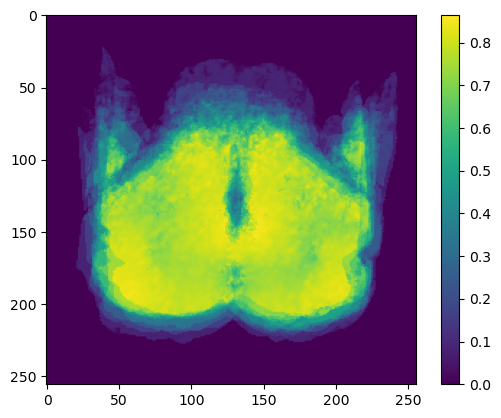

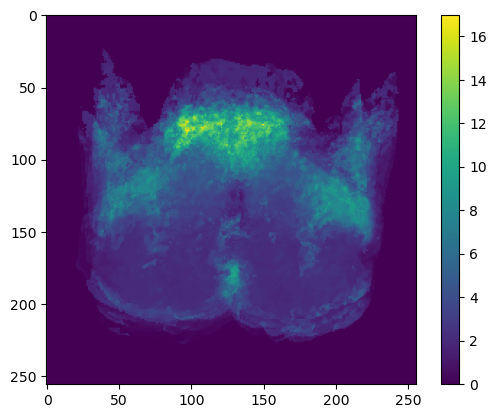

In [12]:
a = np.mean(np.squeeze(mean_response[:,0,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()
a = np.mean(np.squeeze(mean_response_tp[:,0,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()

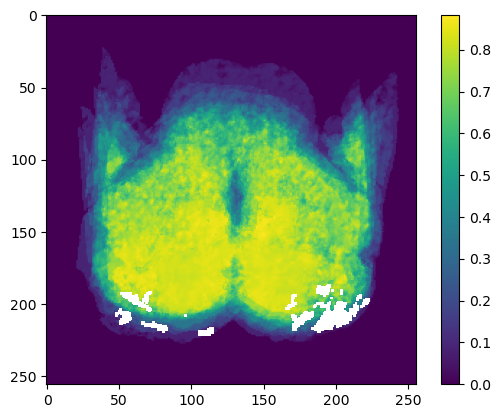

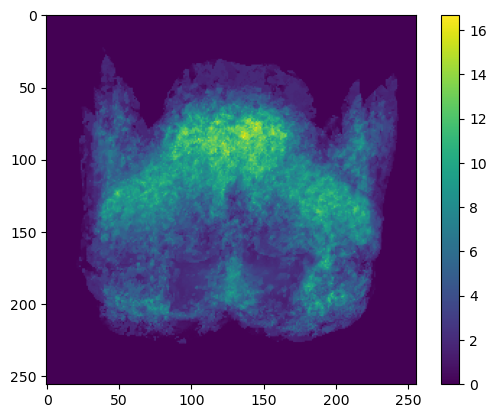

In [13]:
a = np.mean(np.squeeze(mean_response[:,1,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()
a = np.mean(np.squeeze(mean_response_tp[:,1,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()